# Predicting-market-volatility-and-building-short-term-trading-strategies-using-data-from-Reddit

In [1]:
# Required Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import json
import yfinance as yf
import mplfinance as mpf

In [2]:
data=pd.read_excel("SPX.xlsx")
data.set_index("Date").head()

,VIX Index - Last Price (L1),(R1) Open,(R1) High,(R1) Low,(R1) Close,SMAVG (5) on Close,UBB(2),BollMA (20) on Close,LBB(2),SMAVG (50) on Close,...,"Moving Average(Exponential,14)",RSI,Moving Average,BollW (SPX),%B (SPX),ATR(5) (SPX),"MACD(12,26)",Sig(9),Diff,OBV (SPX)
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-04,26.17,1229.23,1248.81,1219.10,1228.10,1231.31,1253.41,1195.63,1137.84,1156.75,...,86.8404,64.9984,62.5017,9.6663,0.7810,19.4208,22.9841,21.0342,1.9499,8.372369e+09
1999-01-05,24.46,1228.10,1246.11,1228.10,1244.78,1235.17,1259.90,1199.03,1138.16,1160.07,...,87.6740,69.0716,64.0759,10.1527,0.8758,18.9505,23.6879,21.5650,2.1229,9.091570e+09
1999-01-06,23.34,1244.78,1272.50,1244.78,1272.34,1241.28,1271.69,1203.26,1134.83,1164.11,...,88.4970,74.3773,65.5572,11.3738,1.0048,21.8737,26.1679,22.4856,3.6823,9.993368e+09
1999-01-07,24.37,1272.34,1272.34,1257.68,1269.73,1248.84,1281.11,1207.68,1134.25,1168.06,...,89.2929,73.0984,66.9682,12.1607,0.9225,19.4691,27.6045,23.5093,4.0952,9.213530e+09
1999-01-08,23.28,1269.73,1278.05,1261.85,1275.09,1258.01,1290.36,1212.26,1134.16,1172.25,...,90.0349,74.0840,68.0927,12.8856,0.9022,18.3794,28.8430,24.5761,4.2670,1.005420e+10


In [3]:
data.columns

Index(['Date', 'VIX Index - Last Price  (L1)', '(R1) Open', '(R1) High',
       '(R1) Low', '(R1) Close', 'SMAVG (5)  on Close', 'UBB(2)',
       'BollMA (20)  on Close', 'LBB(2)', 'SMAVG (50)  on Close',
       'SMAVG (10)  on Close', 'SMAVG (20)  on Close', 'SPX Index - Volume',
       'SMAVG (15)', 'Mom(10)', 'MomMA(5)', 'RMI(Close,14,10)',
       'Moving Average(Exponential,14)', 'RSI', 'Moving Average',
       'BollW (SPX)', '%B (SPX)', 'ATR(5) (SPX)', 'MACD(12,26)', 'Sig(9)',
       'Diff', 'OBV (SPX)'],
      dtype='object')

In [4]:
data.shape

(5104, 28)

In [5]:
data.isnull().sum()

Date                              0
VIX Index - Last Price  (L1)      1
(R1) Open                         1
(R1) High                         1
(R1) Low                          1
(R1) Close                        1
SMAVG (5)  on Close               1
UBB(2)                            1
BollMA (20)  on Close             1
LBB(2)                            1
SMAVG (50)  on Close              1
SMAVG (10)  on Close              1
SMAVG (20)  on Close              1
SPX Index - Volume                0
SMAVG (15)                        0
Mom(10)                           1
MomMA(5)                          1
RMI(Close,14,10)                  1
Moving Average(Exponential,14)    1
RSI                               1
Moving Average                    1
BollW (SPX)                       1
%B (SPX)                          1
ATR(5) (SPX)                      1
MACD(12,26)                       1
Sig(9)                            1
Diff                              1
OBV (SPX)                   

In [6]:
data=data[['Date','(R1) Open','(R1) High','(R1) Low', '(R1) Close','SPX Index - Volume']]
data.head()

,Date,(R1) Open,(R1) High,(R1) Low,(R1) Close,SPX Index - Volume
0,1999-01-04,1229.23,1248.81,1219.10,1228.10,800662720
1,1999-01-05,1228.10,1246.11,1228.10,1244.78,719200704
2,1999-01-06,1244.78,1272.50,1244.78,1272.34,901798592
3,1999-01-07,1272.34,1272.34,1257.68,1269.73,779838080
4,1999-01-08,1269.73,1278.05,1261.85,1275.09,840667392


In [7]:
data=data.loc[(data["Date"]>="2012") & (data["Date"]<="2019")]
data.head()

,Date,(R1) Open,(R1) High,(R1) Low,(R1) Close,SPX Index - Volume
3272,2012-01-03,1258.86,1284.62,1258.86,1277.06,678971776
3273,2012-01-04,1277.03,1278.73,1268.10,1277.30,640869376
3274,2012-01-05,1277.30,1283.05,1265.26,1281.06,676180992
3275,2012-01-06,1280.93,1281.84,1273.34,1277.81,596105216
3276,2012-01-09,1277.83,1281.99,1274.55,1280.70,592425728


In [8]:
data.reset_index(inplace=True)

In [9]:
data.head()

,index,Date,(R1) Open,(R1) High,(R1) Low,(R1) Close,SPX Index - Volume
0,3272,2012-01-03,1258.86,1284.62,1258.86,1277.06,678971776
1,3273,2012-01-04,1277.03,1278.73,1268.10,1277.30,640869376
2,3274,2012-01-05,1277.30,1283.05,1265.26,1281.06,676180992
3,3275,2012-01-06,1280.93,1281.84,1273.34,1277.81,596105216
4,3276,2012-01-09,1277.83,1281.99,1274.55,1280.70,592425728


In [10]:
data.columns

Index(['index', 'Date', '(R1) Open', '(R1) High', '(R1) Low', '(R1) Close',
       'SPX Index - Volume'],
      dtype='object')

In [11]:
data=data.drop(['index'],axis=1)

In [12]:
# data=data.set_index("Date")

In [13]:
data=data.rename(columns={'(R1) Open':'Open','(R1) High':'High','(R1) Low':'Low','(R1) Close':'Close','SPX Index - Volume':'Volume'})

In [14]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,1258.86,1284.62,1258.86,1277.06,678971776
1,2012-01-04,1277.03,1278.73,1268.10,1277.30,640869376
2,2012-01-05,1277.30,1283.05,1265.26,1281.06,676180992
3,2012-01-06,1280.93,1281.84,1273.34,1277.81,596105216
4,2012-01-09,1277.83,1281.99,1274.55,1280.70,592425728


In [15]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1760 non-null   datetime64[ns]
 1   Open    1760 non-null   float64       
 2   High    1760 non-null   float64       
 3   Low     1760 non-null   float64       
 4   Close   1760 non-null   float64       
 5   Volume  1760 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 82.6 KB


In [17]:
 data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

## Sentiment_Analysis 

In [18]:
file = open('wsbData.json', encoding = 'utf-8')
a = []

for line in file:
    a.append(json.loads(line))

df = pd.DataFrame(a)
df.head()

df['date_created'] = pd.to_datetime(df['created_utc'].astype(int), unit='s')
df.drop(columns=['created_utc','archived', 'controversiality','retrieved_on','downs','ups','subreddit'], inplace=True)
df['date'] = df['date_created'].dt.date
df.drop(columns=['date_created','gilded','link_id','id', 
                 'score_hidden', 'name', 'author', 'subreddit_id', 'parent_id', 'author_flair_text', 
                 'author_flair_css_class','distinguished', 'score_hidden', 'name', 'author', 'subreddit_id', 
                 'parent_id', 'author_flair_text', 'author_flair_css_class','distinguished'], inplace=True)

df = df.drop(df[df['body'].map(lambda x: str(x)=="[deleted]")].index)

In [19]:
df.head()

,body,score,date
1,"Lol. Yeah, Welp.",1,2014-10-09
3,Crypto miners is not a significant enough mark...,1,2014-02-19
4,Sold a covered call at 560. I almost wish it d...,1,2014-04-24
5,NFLX because earning reports releases. +10-12%...,1,2014-01-20
6,Agreed 100%. When are their earnings? I'd like...,1,2014-07-25


In [20]:
df.columns

Index(['body', 'score', 'date'], dtype='object')

In [21]:
#importing nltk module
import nltk

nltk.download(["names","stopwords","state_union","twitter_samples",
              "movie_reviews","averaged_perceptron_tagger","vader_lexicon",
              "punkt"])

from nltk.sentiment import SentimentIntensityAnalyzer as SIA
sia = SIA()

[nltk_data] Downloading package names to /home/bibek/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /home/bibek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /home/bibek/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/bibek/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/bibek/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/bibek/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/bibek/nltk_data...
[nltk_data]   Package vader

In [22]:
print(sia.polarity_scores('wow! this nltk library really works'))

{'neg': 0.0, 'neu': 0.55, 'pos': 0.45, 'compound': 0.6239}


In [23]:
#Scoring sentiments 
texts = df['body'].tolist()
negative_scores = []
neutral_scores = []
positive_scores = []
compound_scores = []
final_tag = []
for text in texts:
    score_dictionary = sia.polarity_scores(text)
    negative_scores.append(score_dictionary['neg'])
    positive_scores.append(score_dictionary['pos'])
    neutral_scores.append(score_dictionary['neu'])
    compound_scores.append(score_dictionary['compound'])
    if score_dictionary['compound']>0:
        final_tag.append('positive')
    elif score_dictionary['compound']<0:
        final_tag.append('negative')
    else:
        final_tag.append('neutral')
df['negative_score'] = negative_scores
df['positive_score'] = positive_scores
df['neutral_score'] = neutral_scores
df['compound_score'] = compound_scores
df['final_tag'] = final_tag

In [72]:
df.describe()

,negative_score,positive_score,neutral_score,compound_score
count,2.815063e+06,2.815063e+06,2.815063e+06,2.815063e+06
mean,8.856903e-02,1.165790e-01,7.887217e-01,4.805801e-02
std,1.575593e-01,1.796537e-01,2.296742e-01,4.177409e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,0.000000e+00,0.000000e+00,6.710000e-01,-1.027000e-01
50%,0.000000e+00,0.000000e+00,8.280000e-01,0.000000e+00
75%,1.320000e-01,1.820000e-01,1.000000e+00,3.612000e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,9.999000e-01


In [73]:
df=df.rename(columns={'date':'Date'})

In [74]:
df.head()

,body,score,Date,negative_score,positive_score,neutral_score,compound_score,final_tag
1,"Lol. Yeah, Welp.",1,2014-10-09,0.000,0.833,0.167,0.6124,positive
3,Crypto miners is not a significant enough mark...,1,2014-02-19,0.028,0.239,0.733,0.9680,positive
4,Sold a covered call at 560. I almost wish it d...,1,2014-04-24,0.000,0.203,0.797,0.6821,positive
5,NFLX because earning reports releases. +10-12%...,1,2014-01-20,0.000,0.000,1.000,0.0000,neutral
6,Agreed 100%. When are their earnings? I'd like...,1,2014-07-25,0.000,0.379,0.621,0.6908,positive


In [75]:
df.columns

Index(['body', 'score', 'Date', 'negative_score', 'positive_score',
       'neutral_score', 'compound_score', 'final_tag'],
      dtype='object')

In [76]:
#checking for null values
df.isnull().sum()

body              0
score             0
Date              0
negative_score    0
positive_score    0
neutral_score     0
compound_score    0
final_tag         0
dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2815063 entries, 1 to 2979130
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   body            object        
 1   score           object        
 2   Date            datetime64[ns]
 3   negative_score  float64       
 4   positive_score  float64       
 5   neutral_score   float64       
 6   compound_score  float64       
 7   final_tag       object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 193.3+ MB


In [78]:
#Converting data type 'object' into 'datetime64[ns]'
df['Date']=pd.to_datetime(df.Date)

In [79]:
Merged_Data=pd.merge(data,df,on="Date",how="inner")

In [80]:
Merged_Data.head()

,Date,Open,High,Low,Close,Volume,body,score,negative_score,positive_score,neutral_score,compound_score,final_tag
0,2012-04-11,1358.98,1374.71,1358.98,1368.7,593003200,Shorting AAPL ahead of earnings. My guess is ...,1,0.101,0.000,0.899,-0.4472,negative
1,2012-04-11,1358.98,1374.71,1358.98,1368.7,593003200,BAC 4/19 betting on a beat,1,0.000,0.000,1.000,0.0000,neutral
2,2012-04-11,1358.98,1374.71,1358.98,1368.7,593003200,"I'm looking at CJES, PACD, and SATC.",2,0.000,0.000,1.000,0.0000,neutral
3,2012-04-11,1358.98,1374.71,1358.98,1368.7,593003200,"straddle, call, straddle, put, put, put, strad...",1,0.000,0.127,0.873,0.5640,positive
4,2012-04-11,1358.98,1374.71,1358.98,1368.7,593003200,CROX 4/26\n\nBZH 5/1\n\ni'm expecting both to ...,1,0.000,0.000,1.000,0.0000,neutral


In [81]:
Merged_Data.shape

(2379394, 13)

In [82]:
Merged_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2379394 entries, 0 to 2379393
Data columns (total 13 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Date            datetime64[ns]
 1   Open            float64       
 2   High            float64       
 3   Low             float64       
 4   Close           float64       
 5   Volume          int64         
 6   body            object        
 7   score           object        
 8   negative_score  float64       
 9   positive_score  float64       
 10  neutral_score   float64       
 11  compound_score  float64       
 12  final_tag       object        
dtypes: datetime64[ns](1), float64(8), int64(1), object(3)
memory usage: 254.1+ MB


In [83]:
Merged_Data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'body', 'score',
       'negative_score', 'positive_score', 'neutral_score', 'compound_score',
       'final_tag'],
      dtype='object')

In [84]:
#Total number of Duplicate Date
Merged_Data.Date.duplicated().sum()

2377757

In [85]:
Merged_Data.head()

,Date,Open,High,Low,Close,Volume,body,score,negative_score,positive_score,neutral_score,compound_score,final_tag
0,2012-04-11,1358.98,1374.71,1358.98,1368.7,593003200,Shorting AAPL ahead of earnings. My guess is ...,1,0.101,0.000,0.899,-0.4472,negative
1,2012-04-11,1358.98,1374.71,1358.98,1368.7,593003200,BAC 4/19 betting on a beat,1,0.000,0.000,1.000,0.0000,neutral
2,2012-04-11,1358.98,1374.71,1358.98,1368.7,593003200,"I'm looking at CJES, PACD, and SATC.",2,0.000,0.000,1.000,0.0000,neutral
3,2012-04-11,1358.98,1374.71,1358.98,1368.7,593003200,"straddle, call, straddle, put, put, put, strad...",1,0.000,0.127,0.873,0.5640,positive
4,2012-04-11,1358.98,1374.71,1358.98,1368.7,593003200,CROX 4/26\n\nBZH 5/1\n\ni'm expecting both to ...,1,0.000,0.000,1.000,0.0000,neutral


In [88]:
Merged_Data.drop_duplicates(subset=['Date'],inplace=True)

In [89]:
Merged_Data.index

Int64Index([      0,      14,      17,      19,      21,      38,      40,
                 41,      51,      64,
            ...
            2283620, 2291684, 2298880, 2304656, 2313014, 2327248, 2340179,
            2350217, 2359343, 2370343],
           dtype='int64', length=1637)

In [90]:
Merged_Data['Target_Variable']=np.nan

In [93]:
Merged_Data.loc[Merged_Data.Open>=Merged_Data.Close,"Target_Variable"]=0
Merged_Data.loc[Merged_Data.Open<Merged_Data.Close,"Target_Variable"]=1

In [95]:
Merged_Data.head()

,Date,Open,High,Low,Close,Volume,body,score,negative_score,positive_score,neutral_score,compound_score,final_tag,Target_Variable
0,2012-04-11,1358.98,1374.71,1358.98,1368.70,593003200,Shorting AAPL ahead of earnings. My guess is ...,1,0.101,0.000,0.899,-0.4472,negative,1.0
14,2012-04-12,1368.77,1388.13,1368.77,1387.56,547368832,me too :),1,0.000,0.600,0.400,0.4588,positive,1.0
17,2012-04-13,1387.61,1387.61,1369.85,1370.26,631237824,[AMZN earnings on 4/26](http://www.sys-con.com...,1,0.000,0.000,1.000,0.0000,neutral,0.0
19,2012-04-16,1370.27,1379.66,1365.38,1369.57,596952128,What time is earnings release? If options pre...,1,0.000,0.246,0.754,0.8172,positive,0.0
21,2012-04-17,1369.57,1392.76,1369.57,1390.78,566529216,"Actually, this morning I was going to buy OTM ...",1,0.068,0.045,0.887,-0.1027,negative,1.0


In [96]:
Merged_Data=Merged_Data.set_index("Date")
Merged_Data.head()

,Open,High,Low,Close,Volume,body,score,negative_score,positive_score,neutral_score,compound_score,final_tag,Target_Variable
Date,,,,,,,,,,,,,
2012-04-11,1358.98,1374.71,1358.98,1368.70,593003200,Shorting AAPL ahead of earnings. My guess is ...,1,0.101,0.000,0.899,-0.4472,negative,1.0
2012-04-12,1368.77,1388.13,1368.77,1387.56,547368832,me too :),1,0.000,0.600,0.400,0.4588,positive,1.0
2012-04-13,1387.61,1387.61,1369.85,1370.26,631237824,[AMZN earnings on 4/26](http://www.sys-con.com...,1,0.000,0.000,1.000,0.0000,neutral,0.0
2012-04-16,1370.27,1379.66,1365.38,1369.57,596952128,What time is earnings release? If options pre...,1,0.000,0.246,0.754,0.8172,positive,0.0
2012-04-17,1369.57,1392.76,1369.57,1390.78,566529216,"Actually, this morning I was going to buy OTM ...",1,0.068,0.045,0.887,-0.1027,negative,1.0


In [97]:
Merged_Data.shape

(1637, 13)

In [98]:
Merged_Data=Merged_Data[['Open','High','Low','Close','Volume','score','final_tag','Target_Variable']]

In [99]:
Merged_Data.head()

,Open,High,Low,Close,Volume,score,final_tag,Target_Variable
Date,,,,,,,,
2012-04-11,1358.98,1374.71,1358.98,1368.70,593003200,1,negative,1.0
2012-04-12,1368.77,1388.13,1368.77,1387.56,547368832,1,positive,1.0
2012-04-13,1387.61,1387.61,1369.85,1370.26,631237824,1,neutral,0.0
2012-04-16,1370.27,1379.66,1365.38,1369.57,596952128,1,positive,0.0
2012-04-17,1369.57,1392.76,1369.57,1390.78,566529216,1,negative,1.0


In [100]:
Merged_Data.index

DatetimeIndex(['2012-04-11', '2012-04-12', '2012-04-13', '2012-04-16',
               '2012-04-17', '2012-04-19', '2012-04-20', '2012-04-23',
               '2012-04-24', '2012-04-25',
               ...
               '2018-10-18', '2018-10-19', '2018-10-22', '2018-10-23',
               '2018-10-24', '2018-10-25', '2018-10-26', '2018-10-29',
               '2018-10-30', '2018-10-31'],
              dtype='datetime64[ns]', name='Date', length=1637, freq=None)

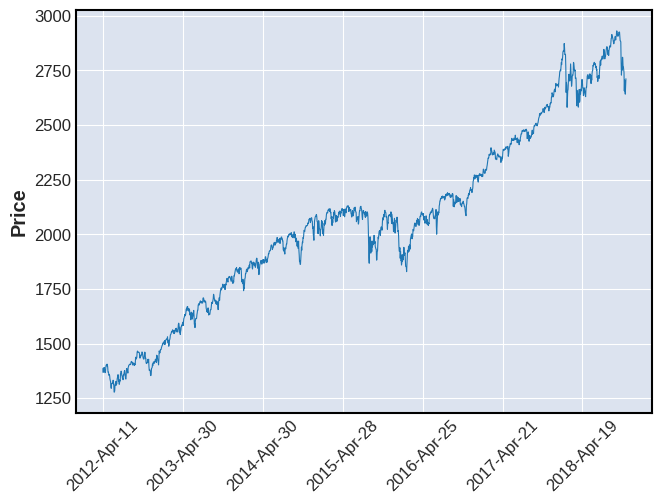

In [101]:
mpf.plot(Merged_Data,type="line")

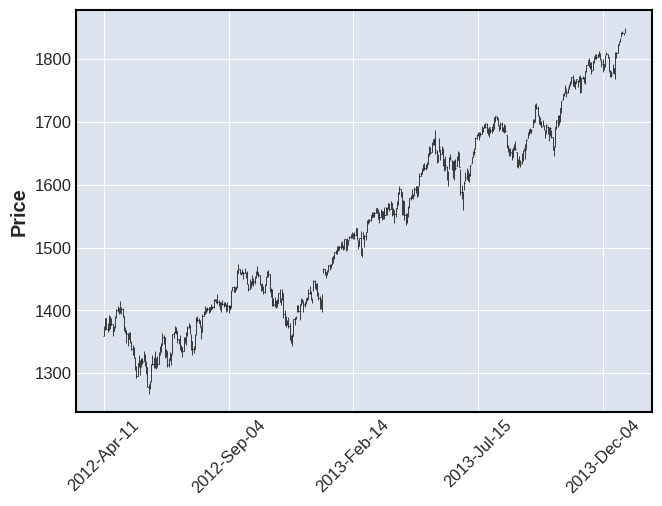

In [102]:
mpf.plot(Merged_Data['2012-04-11':'2013'])

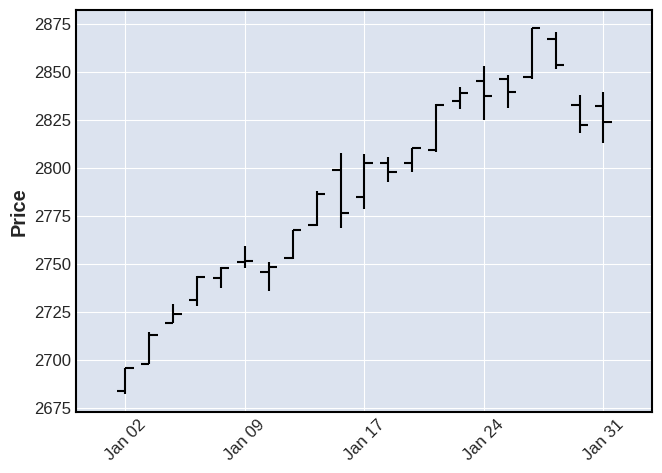

In [103]:
#january Data
mpf.plot(Merged_Data['2018-01'])

####  Line Chart 

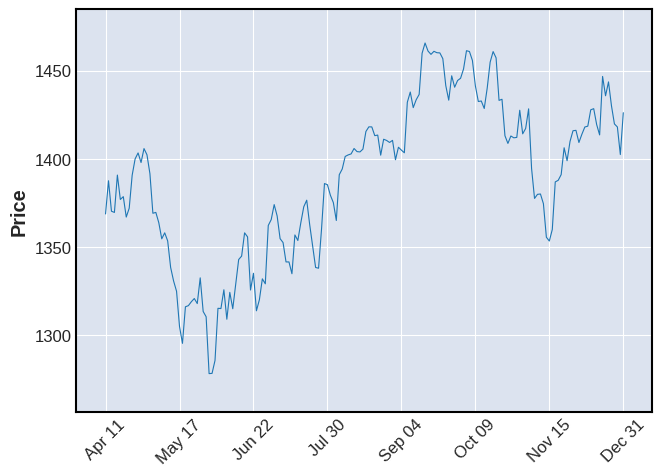

In [104]:
mpf.plot(Merged_Data['2012'],type="line")

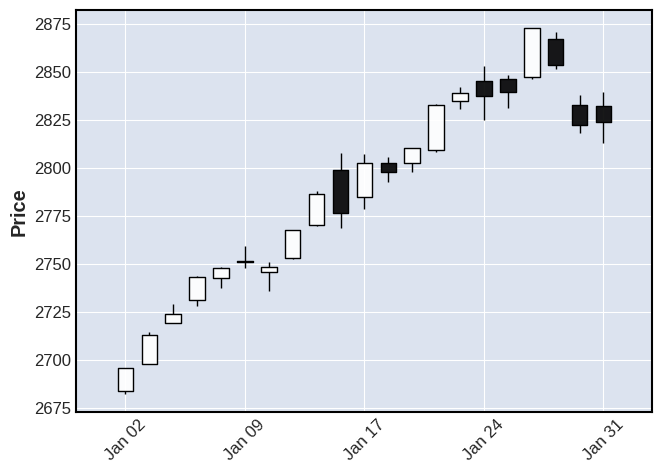

In [105]:
mpf.plot(Merged_Data['2018-01'],type="candle")

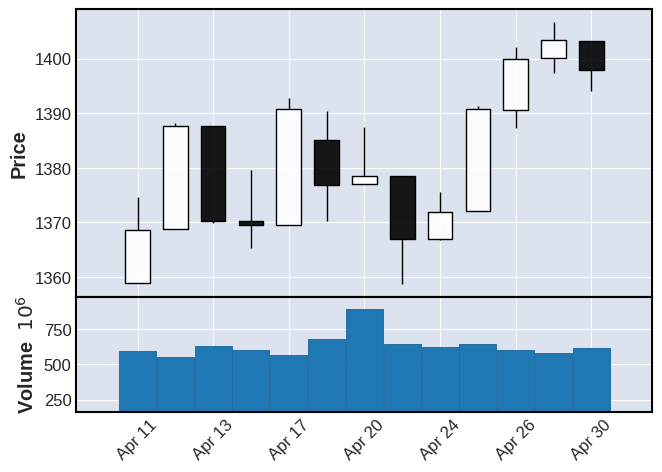

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [106]:
mpf.plot(Merged_Data['2012-04'],type="candle",volume=True)
plt.figure(figsize=(20,10))